In [1]:
import pyodbc

# إعداد الاتصال
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-3SLUOLI\SQLEXPRESS;'  # اسم السيرفر (أو localhost)
    'DATABASE=Northwind;'  # اسم قاعدة البيانات
    'Trusted_Connection=yes;'  # استخدام Windows Authentication
)

# اختبار الاتصال
cursor = conn.cursor()
cursor.execute("SELECT @@VERSION")  # يعرض إصدار SQL Server
for row in cursor:
    print(row)

# إغلاق الاتصال بعد الانتهاء
conn.close()

<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
C:\Users\HP\AppData\Local\Temp\ipykernel_6752\95759085.py:6: SyntaxWarning: invalid escape sequence '\S'
  'SERVER=DESKTOP-3SLUOLI\SQLEXPRESS;'  # اسم السيرفر (أو localhost)


('Microsoft SQL Server 2014 - 12.0.2269.0 (X64) \n\tJun 10 2015 03:35:45 \n\tCopyright (c) Microsoft Corporation\n\tExpress Edition (64-bit) on Windows NT 6.3 <X64> (Build 19045: )\n',)


In [2]:
import pyodbc
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# إعداد الاتصال
def connect_to_sql_server():
    try:
        # الاتصال بقاعدة البيانات باستخدام ODBC Driver 17 لـ SQL Server
        conn = pyodbc.connect(
            'DRIVER={ODBC Driver 17 for SQL Server};'
            'SERVER=DESKTOP-3SLUOLI\SQLEXPRESS;'  # اسم السيرفر (أو localhost إذا كنت تعمل محليًا)
            'DATABASE=Northwind;'  # اسم قاعدة البيانات
            'Trusted_Connection=yes;'  # استخدام Windows Authentication
        )
        return conn
    except pyodbc.Error as e:
        print(f"خطأ في الاتصال: {e}")
        return None

# قراءة البيانات باستخدام Pandas
def read_data_from_sql(conn, query):
    if conn:
        # استخدام pandas لقراءة البيانات من SQL Server إلى DataFrame
        try:
            df = pd.read_sql(query, conn)
            return df
        except Exception as e:
            print(f"خطأ أثناء قراءة البيانات: {e}")
            return None
    return None

# إغلاق الاتصال بشكل آمن
def close_connection(conn):
    if conn:
        conn.close()
        print("تم إغلاق الاتصال بنجاح.")

# برنامج رئيسي
if __name__ == "__main__":
    # الاتصال بقاعدة البيانات
    conn = connect_to_sql_server()
    
    # استعلام SQL لقراءة أول 10 سجلات من جدول
    query = """
        SELECT ProductName, SUM(Quantity) AS TotalQuantity
        FROM Products p
        JOIN [Order Details] od ON p.ProductID = od.ProductID
        GROUP BY ProductName
        ORDER BY TotalQuantity DESC;
        """   # غيّر اسم الجدول إذا لزم الأمر
    
    # قراءة البيانات من SQL Server
    df = read_data_from_sql(conn, query)
    
    if df is not None:
        # عرض البيانات
        
       print(df.head())   # عرض أول 5 سجلات
    else:
        print("لم يتم العثور على بيانات.")
    
    # إغلاق الاتصال بعد الانتهاء
    close_connection(conn)


<>:13: SyntaxWarning: invalid escape sequence '\S'
<>:13: SyntaxWarning: invalid escape sequence '\S'
C:\Users\HP\AppData\Local\Temp\ipykernel_6752\2681990858.py:13: SyntaxWarning: invalid escape sequence '\S'
  'SERVER=DESKTOP-3SLUOLI\SQLEXPRESS;'  # اسم السيرفر (أو localhost إذا كنت تعمل محليًا)


              ProductName  TotalQuantity
0       Camembert Pierrot           1577
1    Raclette Courdavault           1496
2       Gorgonzola Telino           1397
3  Gnocchi di nonna Alice           1263
4                 Pavlova           1158
تم إغلاق الاتصال بنجاح.


C:\Users\HP\AppData\Local\Temp\ipykernel_6752\2681990858.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
# Connect to the Northwind database
conn = sqlite3.connect('northwind.db')

# List all tables in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

Empty DataFrame
Columns: [name]
Index: []


In [4]:
#1
conn = connect_to_sql_server()
query = """
    SELECT  YEAR(OrderDate) AS OrderYear, MONTH(OrderDate) AS OrderMonth,
    COUNT(o.OrderID) AS TotalOrders, SUM(OD.UnitPrice * OD.Quantity * (1 - OD.Discount)) AS TotalRevenue
    FROM Orders O
    JOIN  [Order Details] OD ON O.OrderID = OD.OrderID
    GROUP BY YEAR(OrderDate), MONTH(OrderDate)
    ORDER BY  OrderYear, OrderMonth;
    """   
# قراءة البيانات من SQL Server
df = read_data_from_sql(conn, query)
if df is not None:
    # عرض البيانات
    print(df.head())   # عرض أول 5 سجلات
else:
    print("لم يتم العثور على بيانات.")
# إغلاق الاتصال بعد الانتهاء
close_connection(conn)

   OrderYear  OrderMonth  TotalOrders  TotalRevenue
0       1996           7           59  27861.894974
1       1996           8           69  25485.274970
2       1996           9           57  26381.399973
3       1996          10           73  37515.725197
4       1996          11           66  45600.044844
تم إغلاق الاتصال بنجاح.


C:\Users\HP\AppData\Local\Temp\ipykernel_6752\2681990858.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


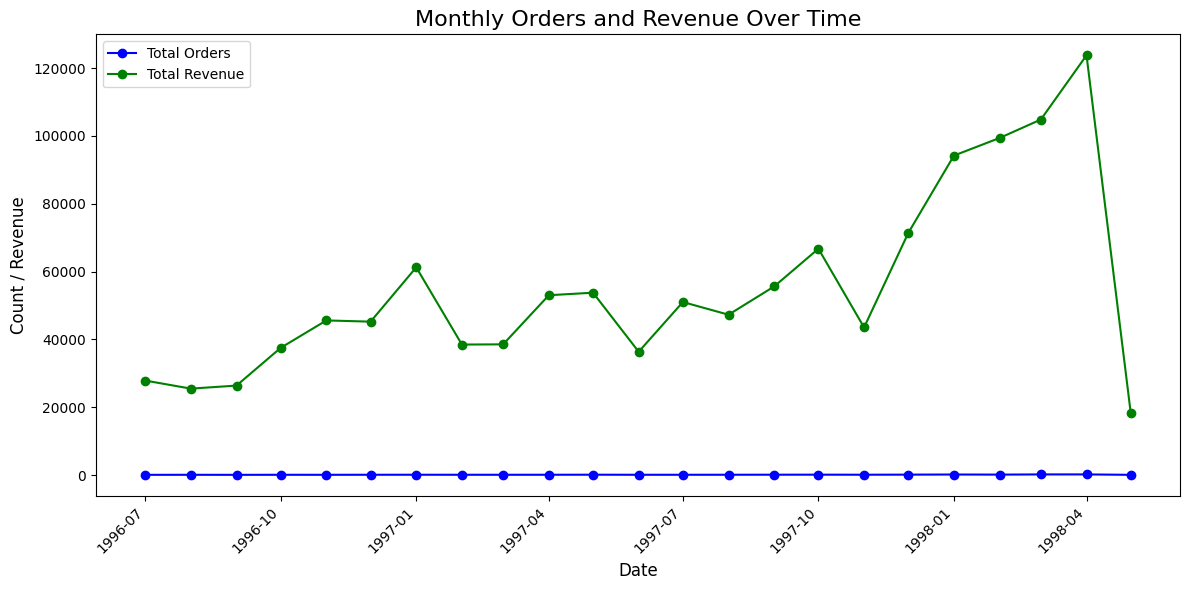

In [5]:
if 'YearMonth' not in df.columns:
    df['YearMonth'] = pd.to_datetime(df['OrderYear'].astype(str) + '-' + df['OrderMonth'].astype(str), errors='coerce')
plt.figure(figsize=(12, 6))
plt.plot(df['YearMonth'], df['TotalOrders'], label='Total Orders', marker='o', linestyle='-', color='blue')
plt.plot(df['YearMonth'], df['TotalRevenue'], label='Total Revenue', marker='o', linestyle='-', color='green')
plt.title('Monthly Orders and Revenue Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count / Revenue', fontsize=12)
plt.legend(fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

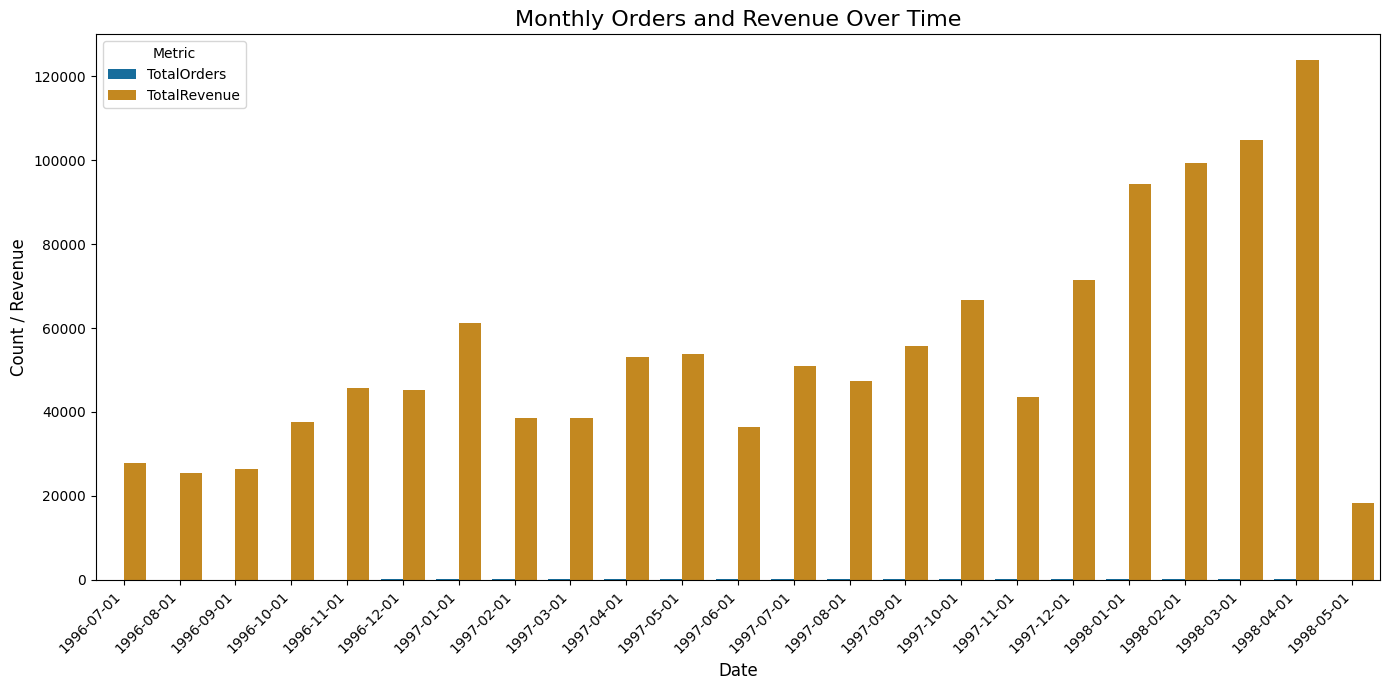

In [6]:
df_melted = pd.melt(df, id_vars='YearMonth', value_vars=['TotalOrders', 'TotalRevenue'], var_name='Metric', value_name='Value')

plt.figure(figsize=(14, 7))
sns.barplot(data=df_melted, x='YearMonth', y='Value', hue='Metric', palette='colorblind')  # Change palette here
plt.title('Monthly Orders and Revenue Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Count / Revenue', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
#2
conn = connect_to_sql_server()
query = """
    SELECT 
    C.CustomerID, 
    C.CompanyName, 
    COUNT(O.OrderID) AS TotalOrders
FROM 
    Customers C
JOIN 
    Orders O ON C.CustomerID = O.CustomerID
WHERE 
    O.OrderDate >= DATEADD(YEAR, -1, GETDATE())
GROUP BY 
    C.CustomerID, C.CompanyName
HAVING 
    COUNT(O.OrderID) > 10
ORDER BY 
    TotalOrders DESC;
    """   
# قراءة البيانات من SQL Server
df = read_data_from_sql(conn, query)
if df is not None:
    # عرض البيانات
    print(df.head())   # عرض أول 5 سجلات
else:
    print("لم يتم العثور على بيانات.")
# إغلاق الاتصال بعد الانتهاء
close_connection(conn)

Empty DataFrame
Columns: [CustomerID, CompanyName, TotalOrders]
Index: []
تم إغلاق الاتصال بنجاح.


C:\Users\HP\AppData\Local\Temp\ipykernel_6752\2681990858.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [8]:
#3
conn = connect_to_sql_server()
query = """
    SELECT 
    ProductID, 
    ProductName, 
    UnitsInStock, 
    ReorderLevel
FROM 
    Products
WHERE 
    UnitsInStock < (SELECT AVG(ReorderLevel) FROM Products);
    """   
# قراءة البيانات من SQL Server
df = read_data_from_sql(conn, query)

if df is not None:
    # عرض البيانات
    print(df.head())   # عرض أول 5 سجلات
else:
    print("لم يتم العثور على بيانات.")
# إغلاق الاتصال بعد الانتهاء
close_connection(conn)

   ProductID                 ProductName  UnitsInStock  ReorderLevel
0          5      Chef Anton's Gumbo Mix             0             0
1          8  Northwoods Cranberry Sauce             6             0
2         17                Alice Mutton             0             0
3         21         Sir Rodney's Scones             3             5
4         29     Thüringer Rostbratwurst             0             0
تم إغلاق الاتصال بنجاح.


C:\Users\HP\AppData\Local\Temp\ipykernel_6752\2681990858.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


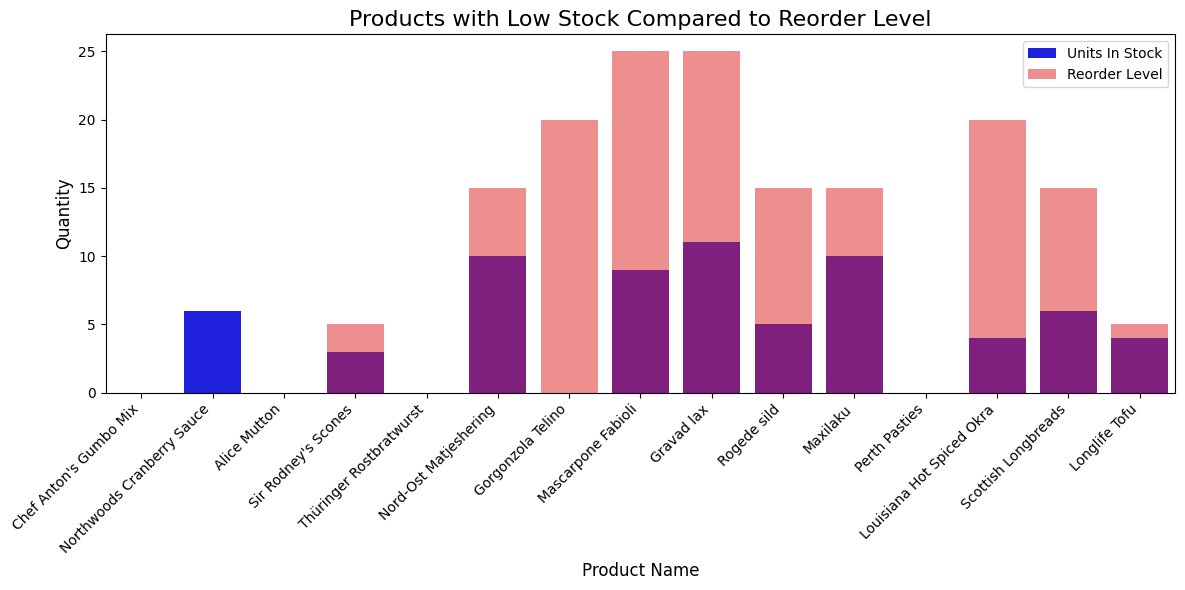

In [9]:
# Create a bar plot for UnitsInStock vs. ReorderLevel
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='ProductName', y='UnitsInStock', color='blue', label='Units In Stock')
sns.barplot(data=df, x='ProductName', y='ReorderLevel', color='red', label='Reorder Level', alpha=0.5)

# Customize the plot
plt.title('Products with Low Stock Compared to Reorder Level', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [10]:
#4
conn = connect_to_sql_server()
    # كتابة الاستعلام
query = """
    SELECT 
        s.SupplierID,
        s.CompanyName,
        s.City,
        s.Country,
        COUNT(p.ProductID) AS ProductCount
    FROM 
        Suppliers s
    LEFT JOIN 
        Products p ON s.SupplierID = p.SupplierID
    GROUP BY 
        s.SupplierID, s.CompanyName, s.City, s.Country
    ORDER BY 
        s.Country, s.City;
    """
df = read_data_from_sql(conn, query)
if df is not None:
    # عرض البيانات
    print(df.head())   # عرض أول 5 سجلات
else:
    print("لم يتم العثور على بيانات.")
# إغلاق الاتصال بعد الانتهاء
close_connection(conn)

   SupplierID                CompanyName           City    Country  \
0           7              Pavlova, Ltd.      Melbourne  Australia   
1          24                G'day, Mate         Sydney  Australia   
2          10  Refrescos Americanas LTDA      Sao Paulo     Brazil   
3          25                  Ma Maison       Montréal     Canada   
4          29           Forêts d'érables  Ste-Hyacinthe     Canada   

   ProductCount  
0             5  
1             3  
2             1  
3             2  
4             2  
تم إغلاق الاتصال بنجاح.


C:\Users\HP\AppData\Local\Temp\ipykernel_6752\2681990858.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


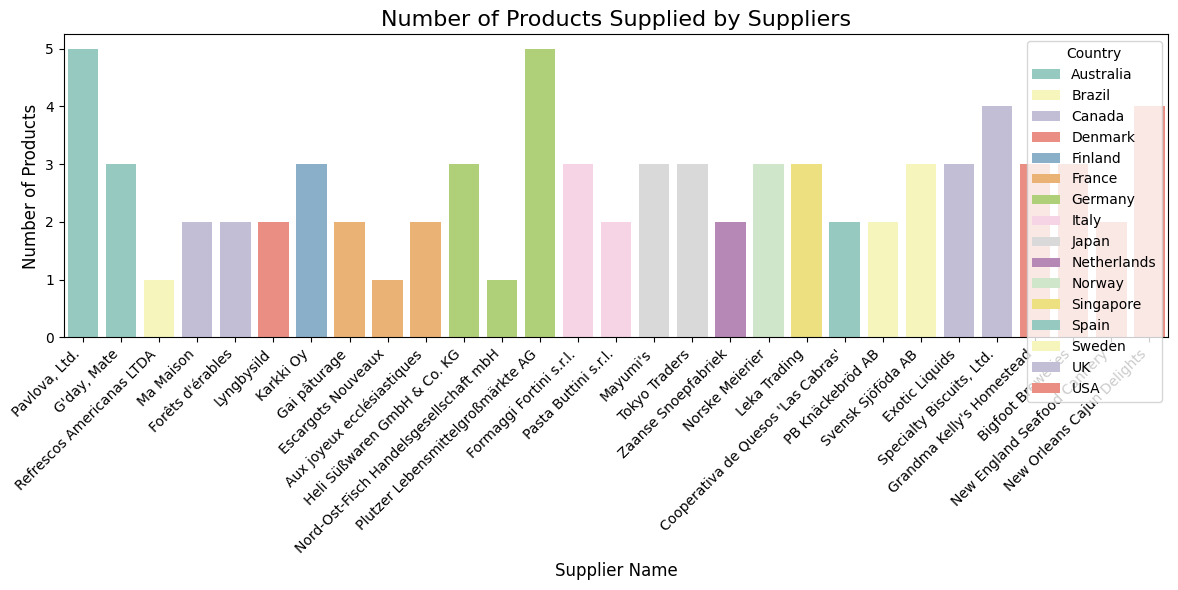

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='CompanyName', y='ProductCount', hue='Country', dodge=False, palette='Set3')
plt.title('Number of Products Supplied by Suppliers', fontsize=16)
plt.xlabel('Supplier Name', fontsize=12)
plt.ylabel('Number of Products', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Country', loc='upper right')
plt.show()

In [12]:
#5
conn = connect_to_sql_server()
    # كتابة الاستعلام
query = """
    SELECT 
        o.OrderID,
        o.OrderDate,
        o.RequiredDate,
        o.ShippedDate,
        s.CompanyName AS ShipperName,
        DATEDIFF(DAY, o.OrderDate, o.ShippedDate) AS DelayInDays
    FROM 
        Orders o
    INNER JOIN 
        Shippers s ON o.ShipVia = s.ShipperID
    WHERE 
        DATEDIFF(DAY, o.OrderDate, o.ShippedDate) > 5;
    """
    # تنفيذ الاستعلام
df = read_data_from_sql(conn, query)
if df is not None:
    # عرض البيانات
    print(df.head())   # عرض أول 5 سجلات
else:
    print("لم يتم العثور على بيانات.")
# إغلاق الاتصال بعد الانتهاء
close_connection(conn)



   OrderID  OrderDate RequiredDate ShippedDate       ShipperName  DelayInDays
0    10248 1996-07-04   1996-08-01  1996-07-16  Federal Shipping           12
1    10251 1996-07-08   1996-08-05  1996-07-15    Speedy Express            7
2    10253 1996-07-10   1996-07-24  1996-07-16    United Package            6
3    10254 1996-07-11   1996-08-08  1996-07-23    United Package           12
4    10257 1996-07-16   1996-08-13  1996-07-22  Federal Shipping            6
تم إغلاق الاتصال بنجاح.


C:\Users\HP\AppData\Local\Temp\ipykernel_6752\2681990858.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


This histogram will show the frequency of orders with different delay durations.

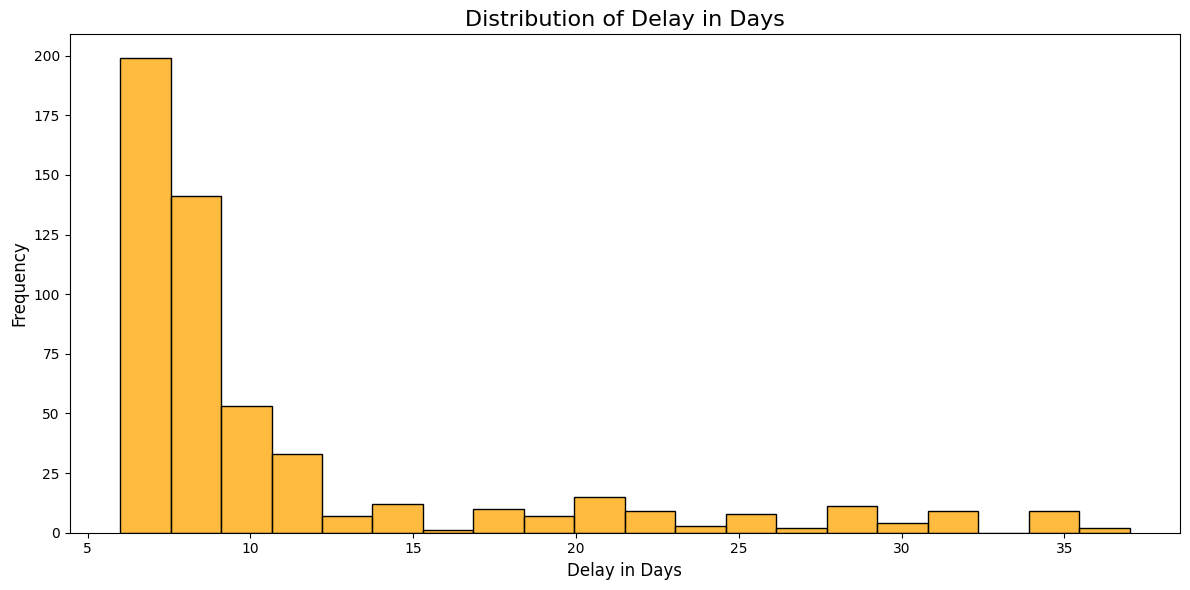

In [13]:
plt.figure(figsize=(12, 6))
sns.histplot(df['DelayInDays'], bins=20, color='orange', edgecolor='black')  # استخدام اللون الأول من اللوحة
plt.title('Distribution of Delay in Days', fontsize=16)
plt.xlabel('Delay in Days', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

In [14]:
#6
conn = connect_to_sql_server()
query = """
    SELECT 
        c.CategoryName,
        AVG(p.UnitPrice) AS AverageProfitability
    FROM 
        Categories c
    INNER JOIN 
        Products p ON c.CategoryID = p.CategoryID
    GROUP BY 
        c.CategoryName
    ORDER BY 
        AverageProfitability DESC;
    """
# تنفيذ الاستعلام
df = read_data_from_sql(conn, query)
if df is not None:
    # عرض البيانات
    print(df.head())   # عرض أول 5 سجلات
else:
    print("لم يتم العثور على بيانات.")
# إغلاق الاتصال بعد الانتهاء
close_connection(conn)


     CategoryName  AverageProfitability
0    Meat/Poultry               54.0066
1       Beverages               37.9791
2         Produce               32.3700
3  Dairy Products               28.7300
4     Confections               25.1600
تم إغلاق الاتصال بنجاح.


C:\Users\HP\AppData\Local\Temp\ipykernel_6752\2681990858.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


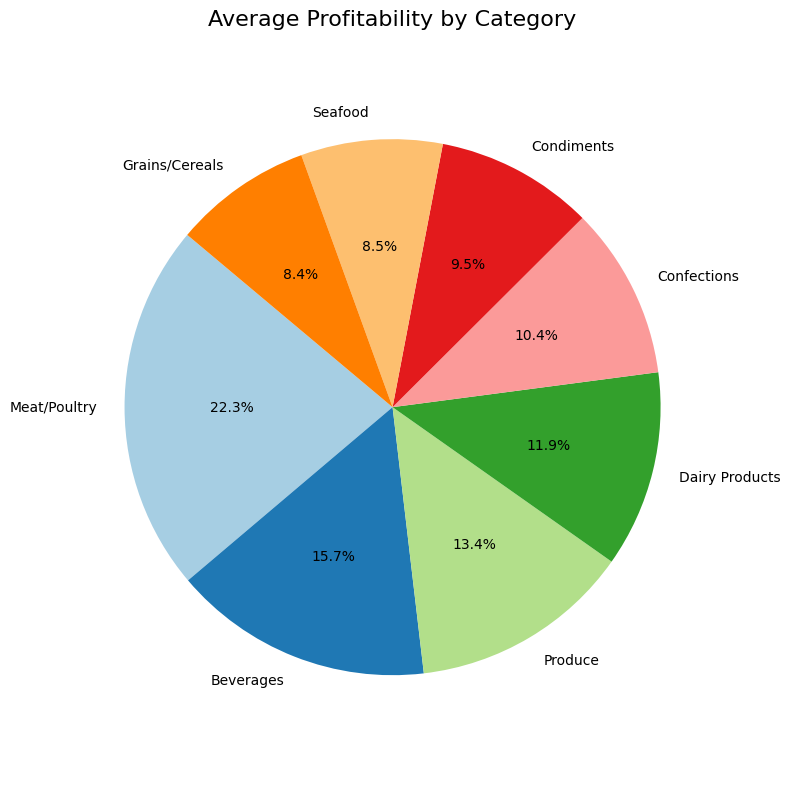

In [15]:
# Plot a pie chart for average profitability by category
plt.figure(figsize=(8, 8))
plt.pie(df['AverageProfitability'], labels=df['CategoryName'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Average Profitability by Category', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [16]:
#7
conn = connect_to_sql_server()
# استعلام SQL لقراءة أول 10 سجلات من جدول
query = """
    SELECT TOP 5
    C.CustomerID, 
    C.CompanyName AS CustomerName, 
    SUM(OD.UnitPrice * OD.Quantity * (1 - OD.Discount)) AS TotalSales
FROM 
    Customers C
JOIN 
    Orders O ON C.CustomerID = O.CustomerID
JOIN 
    [Order Details] OD ON O.OrderID = OD.OrderID
GROUP BY 
    C.CustomerID, C.CompanyName
ORDER BY 
    TotalSales DESC;
 """   
# قراءة البيانات من SQL Server
df = read_data_from_sql(conn, query)
if df is not None:
    # عرض البيانات
    print(df.head())   # عرض أول 5 سجلات
else:
    print("لم يتم العثور على بيانات.")
# إغلاق الاتصال بعد الانتهاء
close_connection(conn)

  CustomerID                  CustomerName     TotalSales
0      QUICK                    QUICK-Stop  110277.304977
1      ERNSH                  Ernst Handel  104874.978714
2      SAVEA            Save-a-lot Markets  104361.949921
3      RATTC    Rattlesnake Canyon Grocery   51097.800333
4      HUNGO  Hungry Owl All-Night Grocers   49979.905001
تم إغلاق الاتصال بنجاح.


C:\Users\HP\AppData\Local\Temp\ipykernel_6752\2681990858.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


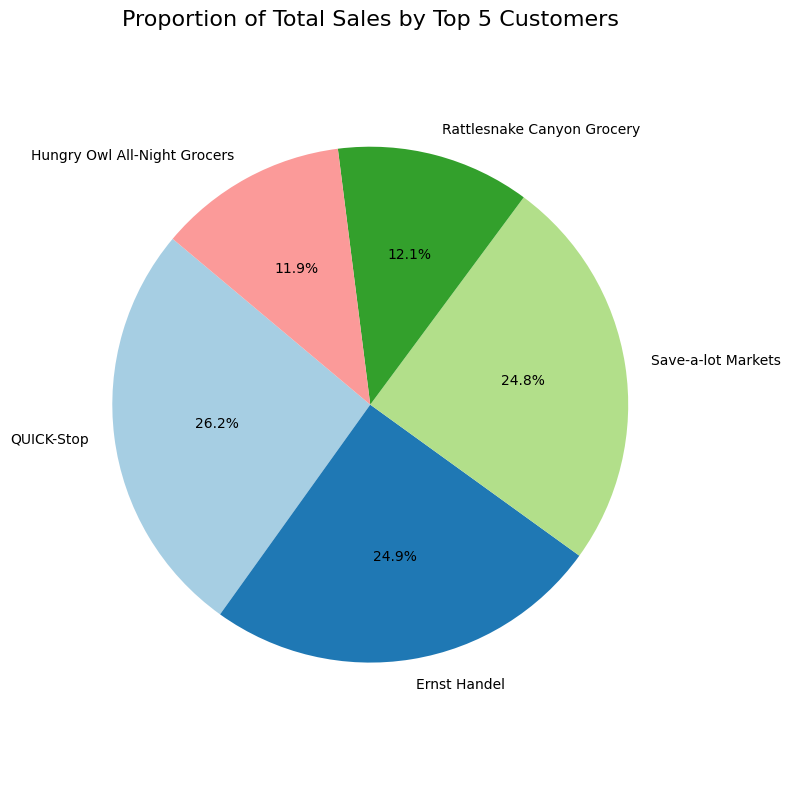

In [17]:
#This pie chart will show the relative share of total sales by each of the top 5 customers.

plt.figure(figsize=(8, 8))
plt.pie(df['TotalSales'], labels=df['CustomerName'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Total Sales by Top 5 Customers', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

In [18]:
#8
conn = connect_to_sql_server()
# استعلام SQL لقراءة أول 10 سجلات من جدول
query = """
SELECT 
    C.CustomerID, 
    C.CompanyName AS CustomerName, 
    AVG(OD.Discount) * 100 AS AverageDiscountPercentage
FROM 
    Customers C
JOIN 
    Orders O ON C.CustomerID = O.CustomerID
JOIN 
    [Order Details] OD ON O.OrderID = OD.OrderID
GROUP BY 
    C.CustomerID, C.CompanyName
HAVING 
    AVG(OD.Discount) > 0.1
ORDER BY 
    AverageDiscountPercentage DESC;
    """
# قراءة البيانات من SQL Server
df = read_data_from_sql(conn, query)
if df is not None:
    # عرض البيانات
    print(df.head())   # عرض أول 5 سجلات
else:
    print("Data not found")
# إغلاق الاتصال بعد الانتهاء
close_connection(conn)


  CustomerID                  CustomerName  AverageDiscountPercentage
0      SIMOB                 Simons bistro                  14.000000
1      LAMAI              La maison d'Asie                  12.580645
2      BOLID     Bólido Comidas preparadas                  11.666667
3      HUNGO  Hungry Owl All-Night Grocers                  11.363636
4      LETSS             Let's Stop N Shop                  11.000000
تم إغلاق الاتصال بنجاح.


C:\Users\HP\AppData\Local\Temp\ipykernel_6752\2681990858.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


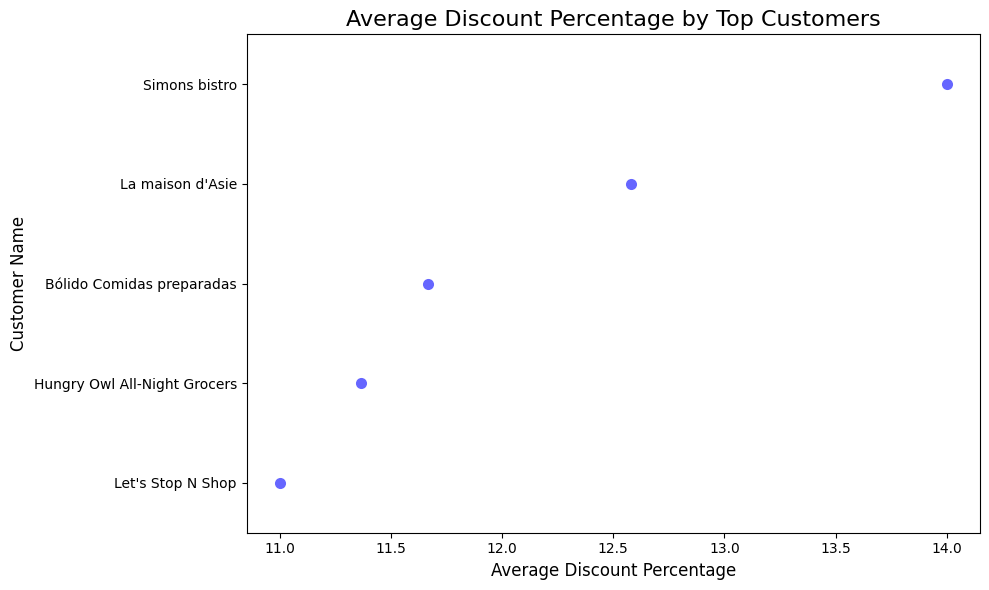

In [19]:
#This dot plot will allow you to see the distribution of average discount percentages across customers, highlighting any significant differences.
# Plot a dot plot for average discount percentage by customer
plt.figure(figsize=(10, 6))
sns.stripplot(data=df, x='AverageDiscountPercentage', y='CustomerName', jitter=True, size=8, color='blue', alpha=0.6)
plt.title('Average Discount Percentage by Top Customers', fontsize=16)
plt.xlabel('Average Discount Percentage', fontsize=12)
plt.ylabel('Customer Name', fontsize=12)
plt.tight_layout()
plt.show()


In [20]:
#9
conn = connect_to_sql_server()
# استعلام SQL لقراءة أول 10 سجلات من جدول
query = """
SELECT 
    E.EmployeeID, 
    E.LastName + ', ' + E.FirstName AS EmployeeName,
    SUM(OD.UnitPrice * OD.Quantity * (1 - OD.Discount)) AS TotalRevenue
FROM 
    Employees E
JOIN 
    Orders O ON E.EmployeeID = O.EmployeeID
JOIN 
    [Order Details] OD ON O.OrderID = OD.OrderID
GROUP BY 
    E.EmployeeID, E.LastName, E.FirstName
ORDER BY 
    TotalRevenue DESC;
    """   
# قراءة البيانات من SQL Server
df = read_data_from_sql(conn, query)
if df is not None:
    # عرض البيانات
    print(df.head())   # عرض أول 5 سجلات
else:
    print("Data not found")
# إغلاق الاتصال بعد الانتهاء
close_connection(conn)

   EmployeeID       EmployeeName   TotalRevenue
0           4  Peacock, Margaret  232890.845947
1           3   Leverling, Janet  202812.842793
2           1     Davolio, Nancy  192107.604321
3           2     Fuller, Andrew  166537.754978
4           8    Callahan, Laura  126862.277704
تم إغلاق الاتصال بنجاح.


C:\Users\HP\AppData\Local\Temp\ipykernel_6752\2681990858.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


C:\Users\HP\AppData\Local\Temp\ipykernel_6752\238607726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='TotalRevenue', y='EmployeeName', palette='Blues_d')


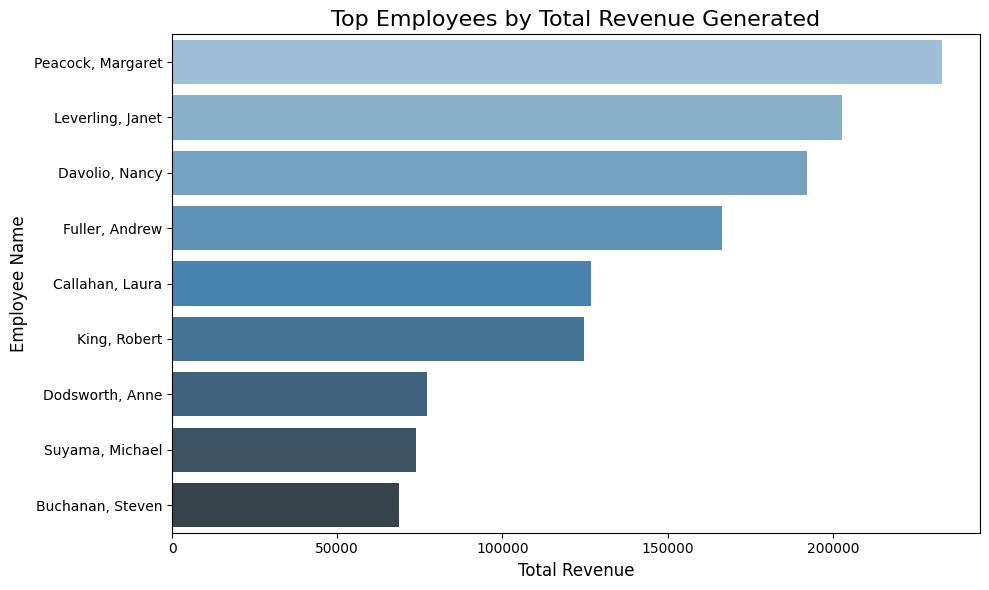

In [21]:
#Horizontal Bar Chart to visualize total revenue by employee.
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='TotalRevenue', y='EmployeeName', palette='Blues_d')
plt.title('Top Employees by Total Revenue Generated', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Employee Name', fontsize=12)
plt.tight_layout()
plt.show()

In [22]:
#10
conn = connect_to_sql_server()
query = """
 SELECT TOP 5
    P.ProductName, 
    SUM(OD.Quantity) AS TotalQuantitySold
FROM 
    Products P
JOIN 
    [Order Details] OD ON P.ProductID = OD.ProductID
GROUP BY 
    P.ProductName
ORDER BY 
    TotalQuantitySold DESC;
    """   
# قراءة البيانات من SQL Server
df = read_data_from_sql(conn, query)
if df is not None:
    # عرض البيانات
    print(df.head())   # عرض أول 5 سجلات
else:
    print("Data not found")
# إغلاق الاتصال بعد الانتهاء
close_connection(conn)

              ProductName  TotalQuantitySold
0       Camembert Pierrot               1577
1    Raclette Courdavault               1496
2       Gorgonzola Telino               1397
3  Gnocchi di nonna Alice               1263
4                 Pavlova               1158
تم إغلاق الاتصال بنجاح.


C:\Users\HP\AppData\Local\Temp\ipykernel_6752\2681990858.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


C:\Users\HP\AppData\Local\Temp\ipykernel_6752\3104989717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='TotalQuantitySold', y='ProductName', palette=(['#FF6347', '#4CAF50', '#00BFFF']))
C:\Users\HP\AppData\Local\Temp\ipykernel_6752\3104989717.py:3: UserWarning: 
The palette list has fewer values (3) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=df, x='TotalQuantitySold', y='ProductName', palette=(['#FF6347', '#4CAF50', '#00BFFF']))


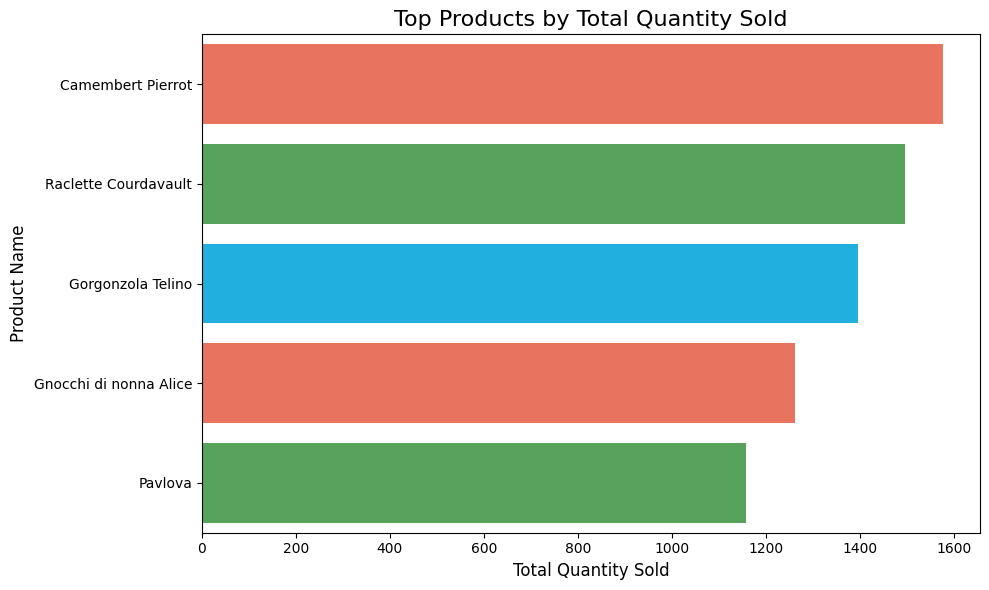

In [23]:
# Plot a Horizontal Bar Chart for total quantity sold by product
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='TotalQuantitySold', y='ProductName', palette=(['#FF6347', '#4CAF50', '#00BFFF']))
plt.title('Top Products by Total Quantity Sold', fontsize=16)
plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.tight_layout()
plt.show()

In [24]:
#11
conn = connect_to_sql_server()
# استعلام SQL لقراءة أول 10 سجلات من جدول
query = """
    SELECT 
    C.CompanyName AS CustomerName, 
    O.OrderDate
FROM 
    Orders O
JOIN 
    Customers C ON O.CustomerID = C.CustomerID
WHERE 
    O.ShippedDate IS NULL
ORDER BY 
    O.OrderDate DESC;
    """   
# قراءة البيانات من SQL Server
df = read_data_from_sql(conn, query)

if df is not None:
    # عرض البيانات
    print(df.head())   # عرض أول 5 سجلات
else:
    print("Data not found")
# إغلاق الاتصال بعد الانتهاء
close_connection(conn)

                 CustomerName  OrderDate
0               Simons bistro 1998-05-06
1          Richter Supermarkt 1998-05-06
2                    Bon app' 1998-05-06
3  Rattlesnake Canyon Grocery 1998-05-06
4         Lehmanns Marktstand 1998-05-05
تم إغلاق الاتصال بنجاح.


C:\Users\HP\AppData\Local\Temp\ipykernel_6752\2681990858.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


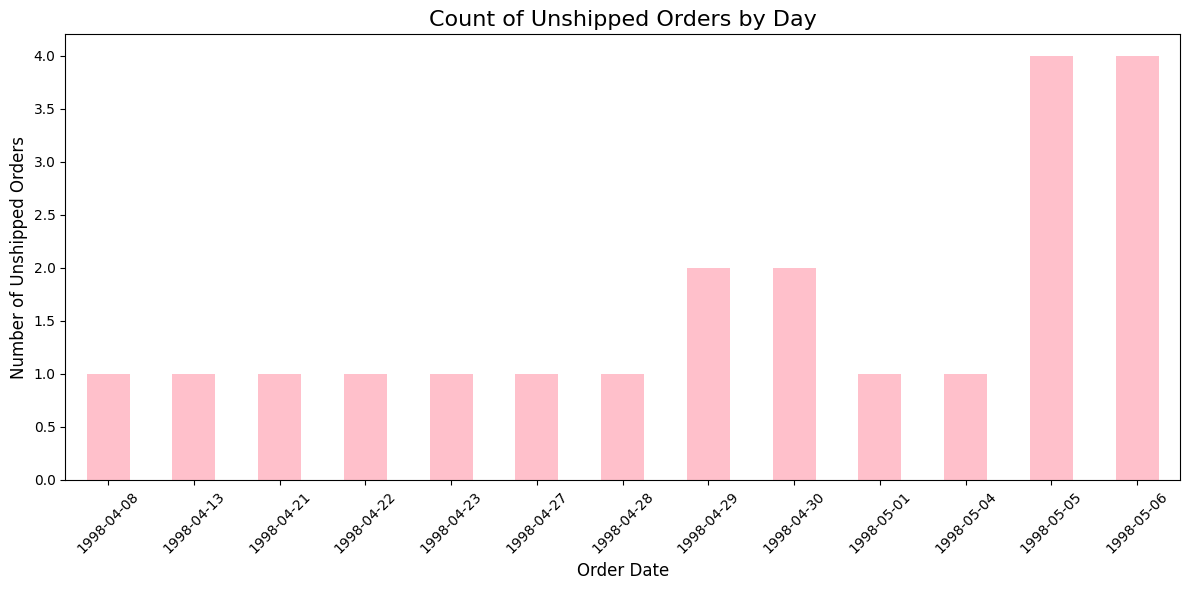

In [25]:
# Plot the count of unshipped orders per day
#This chart will give a view of how many unshipped orders there are each day
df_counts = df.groupby(df['OrderDate'].dt.date).size()

plt.figure(figsize=(12, 6))
df_counts.plot(kind='bar', color='pink')
plt.title('Count of Unshipped Orders by Day', fontsize=16)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Number of Unshipped Orders', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
#12
conn = connect_to_sql_server()
# استعلام SQL لقراءة أول 10 سجلات من جدول
query = """
 SELECT 
    C.Country, 
    C.City, 
    SUM(OD.UnitPrice * OD.Quantity * (1 - OD.Discount)) AS TotalSales
FROM 
    Orders O
JOIN 
    Customers C ON O.CustomerID = C.CustomerID
JOIN 
    [Order Details] OD ON O.OrderID = OD.OrderID
GROUP BY 
    C.Country, C.City
ORDER BY 
    TotalSales DESC;
    """   
# قراءة البيانات من SQL Server
df = read_data_from_sql(conn, query)
if df is not None:
    # عرض البيانات
    print(df.head())   # عرض أول 5 سجلات
else:
    print("Data not found")
# إغلاق الاتصال بعد الانتهاء
close_connection(conn)

   Country            City     TotalSales
0  Germany       Cunewalde  110277.304977
1  Austria            Graz  104874.978714
2      USA           Boise  104361.949921
3       UK          London   52825.010068
4   Brazil  Rio de Janeiro   51956.979933
تم إغلاق الاتصال بنجاح.


C:\Users\HP\AppData\Local\Temp\ipykernel_6752\2681990858.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


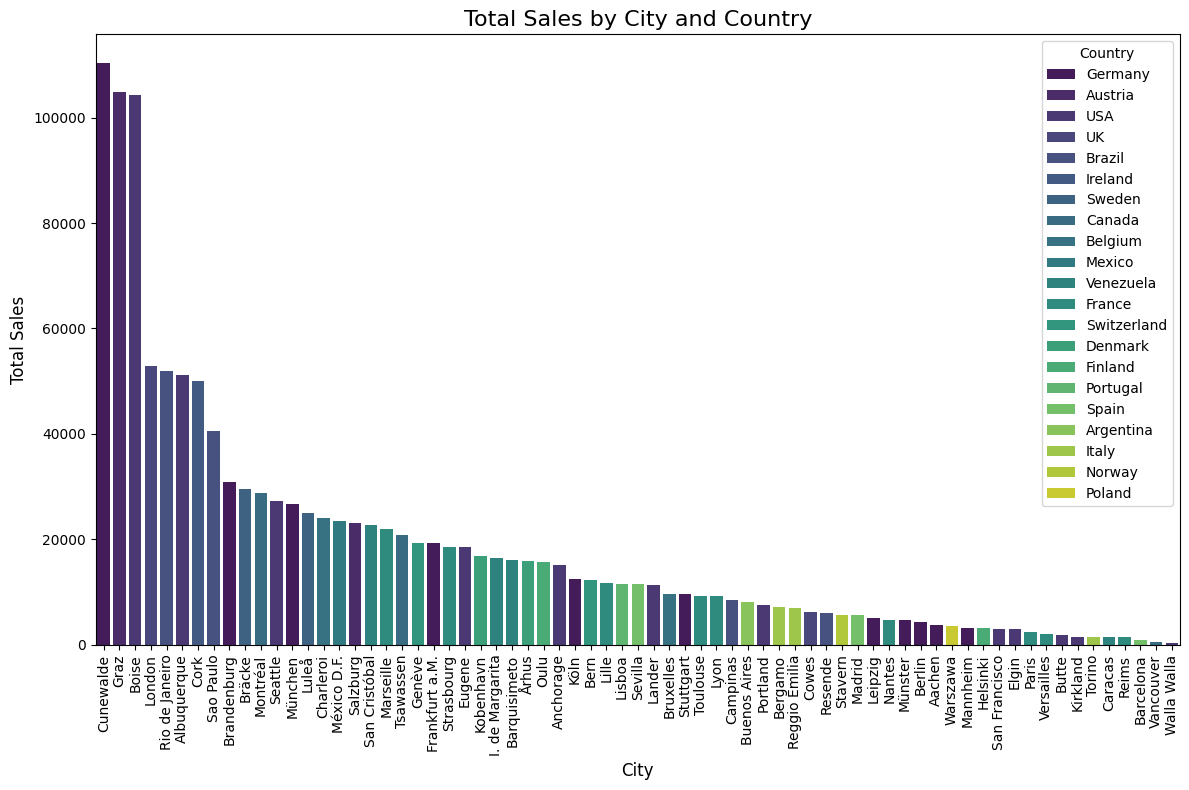

In [27]:
#This will give you a clear visual representation of total sales by city,
#with the cities on the x-axis and sales on the y-axis. Different bars will represent different countries.
# Set up the plot size
plt.figure(figsize=(12, 8))

# Create the bar chart using seaborn
sns.barplot(x='City', y='TotalSales', hue='Country', data=df, palette='viridis')

# Set chart title and labels
plt.title('Total Sales by City and Country', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=90)  # Rotate the x-axis labels if cities are long

# Show the plot
plt.tight_layout()
plt.show()

In [28]:
#13
conn = connect_to_sql_server()
# استعلام SQL لقراءة أول 10 سجلات من جدول
query = """
    SELECT 
    S.SupplierID, 
    S.CompanyName AS SupplierName, 
    P.ProductName, 
    P.UnitPrice
FROM 
    Suppliers S
JOIN 
    Products P ON S.SupplierID = P.SupplierID
WHERE 
    P.UnitPrice > (SELECT AVG(UnitPrice) FROM Products)
ORDER BY 
    P.UnitPrice DESC;
    """   
# قراءة البيانات من SQL Server
df = read_data_from_sql(conn, query)
if df is not None:
    # عرض البيانات
    print(df.head())   # عرض أول 5 سجلات
else:
    print("Data not found")
# إغلاق الاتصال بعد الانتهاء
close_connection(conn)

   SupplierID                       SupplierName              ProductName  \
0          18         Aux joyeux ecclésiastiques            Côte de Blaye   
1          12  Plutzer Lebensmittelgroßmärkte AG  Thüringer Rostbratwurst   
2           4                      Tokyo Traders          Mishi Kobe Niku   
3           8           Specialty Biscuits, Ltd.   Sir Rodney's Marmalade   
4           7                      Pavlova, Ltd.         Carnarvon Tigers   

   UnitPrice  
0     263.50  
1     123.79  
2      97.00  
3      81.00  
4      62.50  
تم إغلاق الاتصال بنجاح.


C:\Users\HP\AppData\Local\Temp\ipykernel_6752\2681990858.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


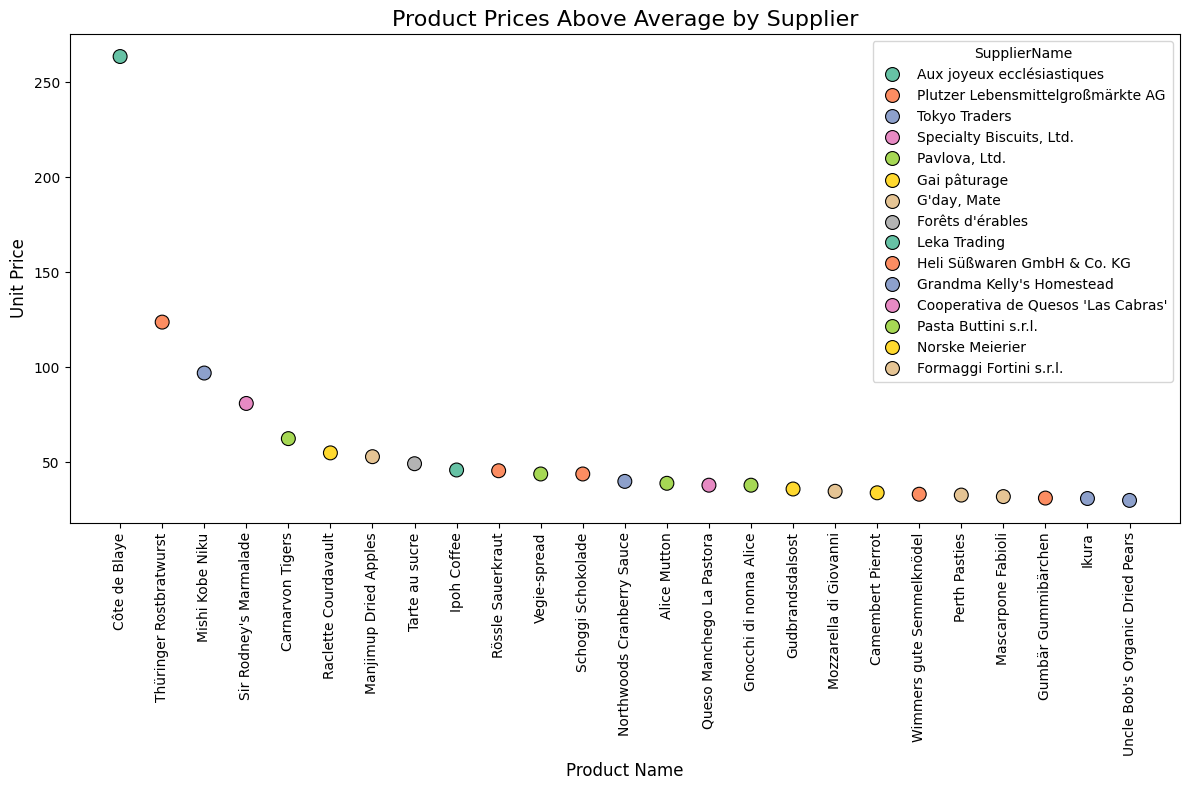

In [29]:
# we can visualize how the Unit Price of products varies across different suppliers, with each point representing a product and its associated price.
# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='ProductName', y='UnitPrice', hue='SupplierName', palette='Set2', s=100, edgecolor='black')

# Set chart title and labels
plt.title('Product Prices Above Average by Supplier', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Unit Price', fontsize=12)
plt.xticks(rotation=90)  # Rotate product names for readability
plt.tight_layout()

# Show the plot
plt.show()

In [36]:
#14
conn = connect_to_sql_server()
# استعلام SQL لقراءة أول 10 سجلات من جدول
query = """
  SELECT 
    P.ProductName
FROM 
    Products P
LEFT JOIN 
    [Order Details] OD ON P.ProductID = OD.ProductID
WHERE 
    OD.OrderID IS NULL;
    """   
# قراءة البيانات من SQL Server
df = read_data_from_sql(conn, query)
if df is not None:
    # عرض البيانات
    print(df.head())   # عرض أول 5 سجلات
else:
    print("Data not found")
# إغلاق الاتصال بعد الانتهاء
close_connection(conn)

Empty DataFrame
Columns: [ProductName]
Index: []
تم إغلاق الاتصال بنجاح.


C:\Users\HP\AppData\Local\Temp\ipykernel_6752\2681990858.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [31]:
#15
conn = connect_to_sql_server()
# استعلام SQL لقراءة أول 10 سجلات من جدول
query = """
    SELECT 
    C.CategoryName, 
    COUNT(DISTINCT O.OrderID) AS NumberOfOrders,
    SUM(OD.UnitPrice * OD.Quantity * (1 - OD.Discount)) AS TotalRevenue
FROM 
    Categories C
JOIN 
    Products P ON C.CategoryID = P.CategoryID
JOIN 
    [Order Details] OD ON P.ProductID = OD.ProductID
JOIN 
    Orders O ON OD.OrderID = O.OrderID
GROUP BY 
    C.CategoryName
ORDER BY 
    TotalRevenue DESC;
    """   
# قراءة البيانات من SQL Server
df = read_data_from_sql(conn, query)
if df is not None:
    # عرض البيانات
    print(df.head())   # عرض أول 5 سجلات
else:
    print("Data not found")
# إغلاق الاتصال بعد الانتهاء
close_connection(conn)

     CategoryName  NumberOfOrders   TotalRevenue
0       Beverages             354  267868.180523
1  Dairy Products             303  234507.285217
2     Confections             295  167357.224832
3    Meat/Poultry             161  163022.359089
4         Seafood             291  131261.737425
تم إغلاق الاتصال بنجاح.


C:\Users\HP\AppData\Local\Temp\ipykernel_6752\2681990858.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


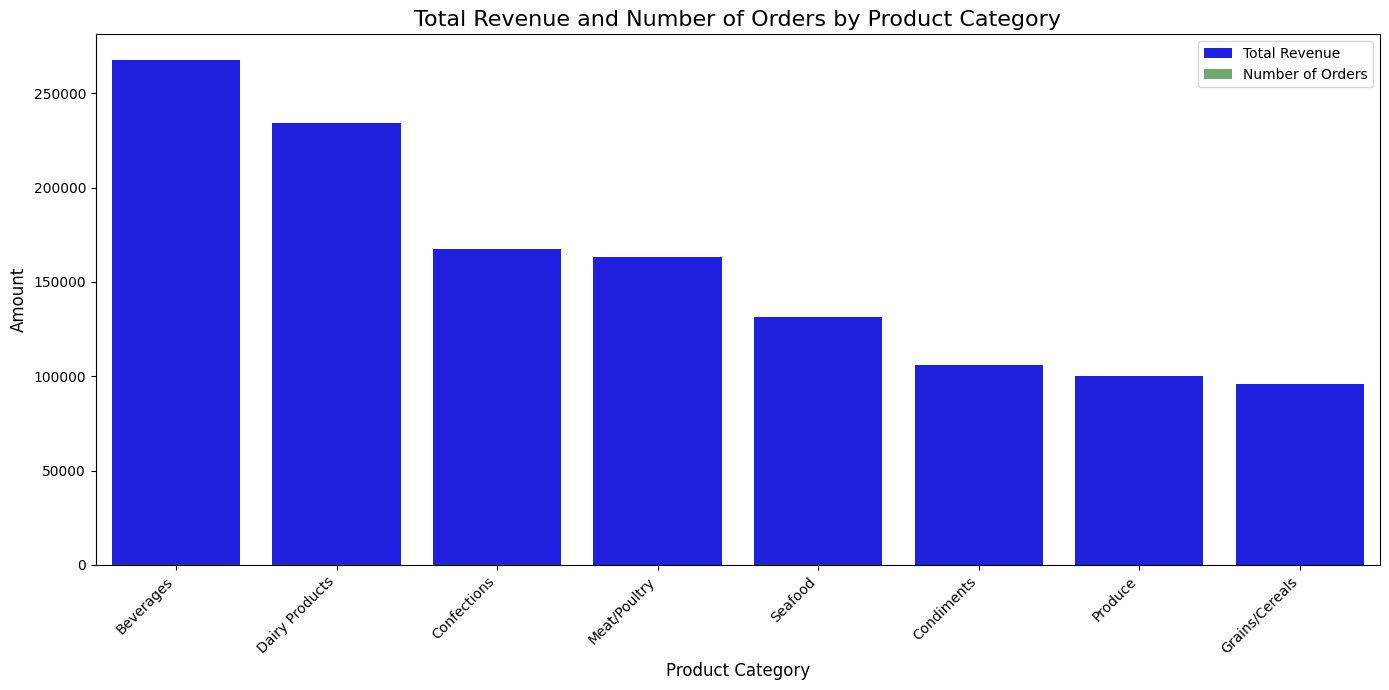

In [32]:
#TotalRevenue and NumberOfOrders are displayed for each category. The blue bars represent revenue, while the green bars represent the number of orders.
# Create a bar chart to compare Total Revenue and Number of Orders per Category
plt.figure(figsize=(14, 7))

# Create a bar plot for Total Revenue
sns.barplot(x='CategoryName', y='TotalRevenue', data=df, color='blue', label='Total Revenue')

# Create a second bar plot for Number of Orders
sns.barplot(x='CategoryName', y='NumberOfOrders', data=df, color='green', label='Number of Orders', alpha=0.6)

# Add labels and title
plt.title('Total Revenue and Number of Orders by Product Category', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6752\2313948340.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sales_by_country = pd.read_sql_query("""
C:\Users\HP\AppData\Local\Temp\ipykernel_6752\2313948340.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalSales', y='ShipCountry', data=sales_by_country, palette='coolwarm')


تم إغلاق الاتصال بنجاح.


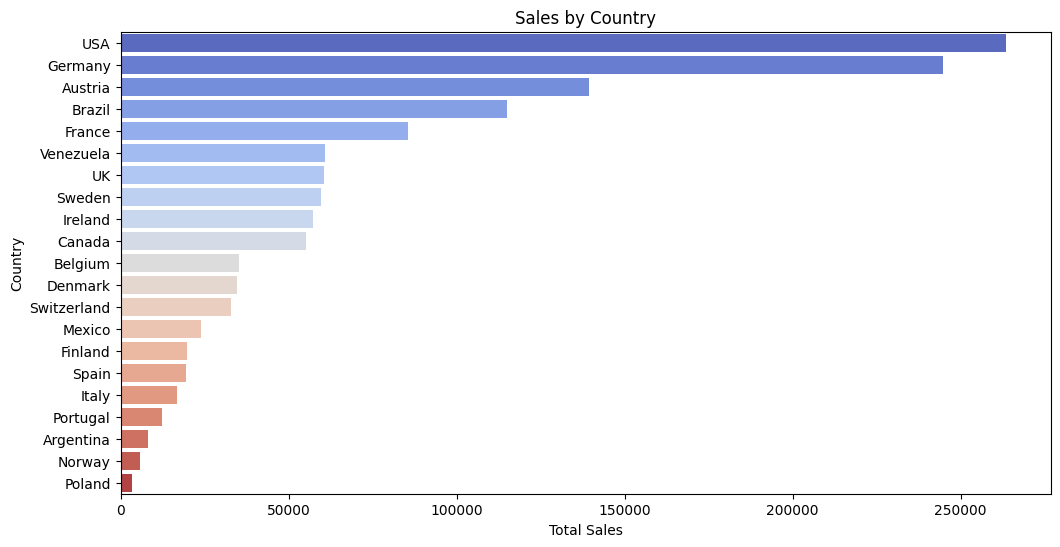

In [33]:
# Query sales by country
conn = connect_to_sql_server()

sales_by_country = pd.read_sql_query("""
    SELECT o.ShipCountry, 
           SUM(od.UnitPrice * od.Quantity) AS TotalSales
    FROM [Order Details] od
    JOIN Orders o ON od.OrderID = o.OrderID
    GROUP BY o.ShipCountry
    ORDER BY TotalSales DESC;
""", conn)
close_connection(conn)
# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalSales', y='ShipCountry', data=sales_by_country, palette='coolwarm')
plt.title("Sales by Country")
plt.xlabel("Total Sales")
plt.ylabel("Country")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_6752\1598518250.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  monthly_sales = pd.read_sql_query("""


تم إغلاق الاتصال بنجاح.


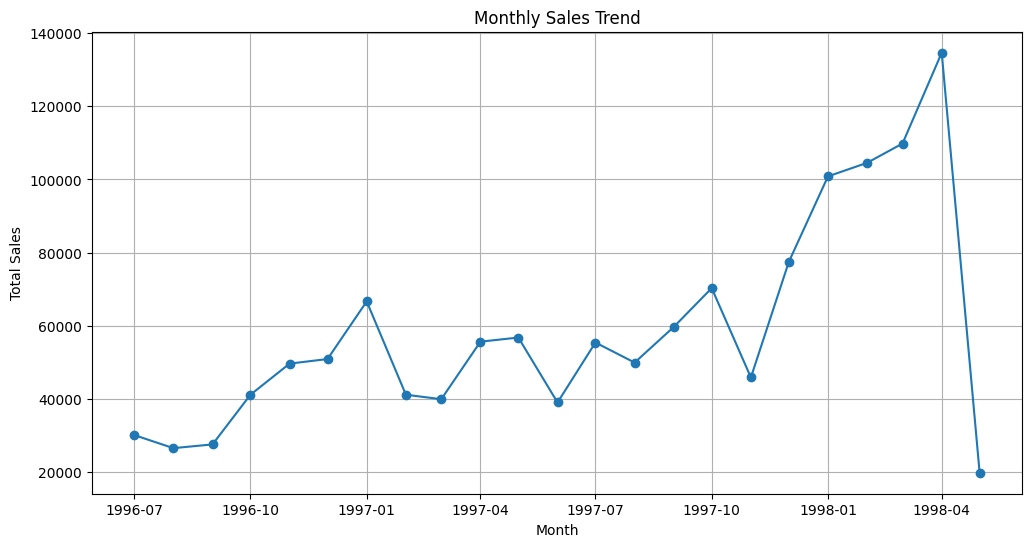

In [34]:
conn = connect_to_sql_server()
monthly_sales = pd.read_sql_query("""
    SELECT FORMAT(o.OrderDate, 'yyyy-MM') AS Month, 
           SUM(od.UnitPrice * od.Quantity) AS TotalSales
    FROM [Order Details] od
    JOIN Orders o ON od.OrderID = o.OrderID
    GROUP BY FORMAT(o.OrderDate, 'yyyy-MM')
    ORDER BY Month;
""", conn)
close_connection(conn)

# Plot the results
monthly_sales['Month'] = pd.to_datetime(monthly_sales['Month'])
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['TotalSales'], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_6752\57814280.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_products = pd.read_sql_query("""
C:\Users\HP\AppData\Local\Temp\ipykernel_6752\57814280.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TotalSales', y='ProductName', data=top_products, palette='viridis')


تم إغلاق الاتصال بنجاح.


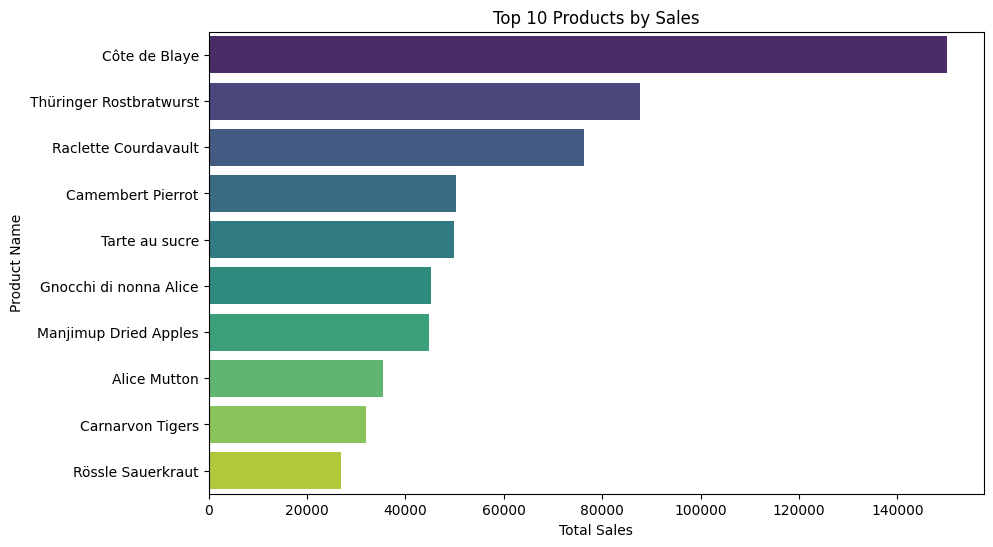

In [35]:
# Query top 10 products by sales
conn = connect_to_sql_server()

top_products = pd.read_sql_query("""
    SELECT TOP 10 
           p.ProductName, 
           SUM(od.UnitPrice * od.Quantity) AS TotalSales
    FROM [Order Details] od
    JOIN Products p ON od.ProductID = p.ProductID
    GROUP BY p.ProductName
    ORDER BY TotalSales DESC;
""", conn)

close_connection(conn)
# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalSales', y='ProductName', data=top_products, palette='viridis')
plt.title("Top 10 Products by Sales")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()